# Using Wikipedia, Pandas, and Geopandas visualize all the Ancient Libraries and Where they were

Helpful Websites:
    1. https://www.thecrazyprogrammer.com/2018/05/wikipedia-api-python-tutorial.html
    
Installation of package: pip install wikipedia

In [78]:
import wikipedia
import regex as re
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib as plt

In [79]:
##Print Summary
print(wikipedia.summary("Ancient Libraries")) 

The great libraries of the ancient world served as archives for empires, sanctuaries for sacred writings, and depositories of literature and chronicles.




In [80]:
##List of Titles
import wikipedia
print(wikipedia.search("Ancient Libraries"))

['List of libraries in the ancient world', 'Library of Alexandria', 'Library', 'Imperial Library of Constantinople', 'Library of Ashurbanipal', 'History of libraries', 'Ancient Greek', 'Library of Pergamum', 'Ancient Rome', 'Ulpian Library']


In [81]:
##Url of a title
import wikipedia
page = wikipedia.page("List of libraries in the ancient world")
print(page.url)

https://en.wikipedia.org/wiki/List_of_libraries_in_the_ancient_world


In [82]:
import wikipedia
page = wikipedia.page("List of libraries in the ancient world")
print(page.title)

List of libraries in the ancient world


In [83]:
import wikipedia
page = wikipedia.page("Elba")
print(page.images[0])

https://upload.wikimedia.org/wikipedia/commons/a/ae/Aerial_view_of_Elba_2.jpg


In [84]:
import wikipedia
page_t = wikipedia.page("List of World Heritage Sites in the Arab states")
print(page_t.content)

This is a list of World Heritage Sites in the Arab states, in Western Asia and North Africa, occupy an area stretching from the Atlantic Ocean in the west to the Arabian Sea in the east, and from the Mediterranean Sea.


== List ==
The list below contains an image of the site or part of the site; the name as inscribed by UNESCO; the location; the nominating state party; the criteria met by the site, including if it is a cultural, natural or mixed; the area in hectares and acres, excluding any buffer zones, with a value of zero implying that no data is published by UNESCO; the year the site was inscribed; and a description of the site.


== See also ==
List of World Heritage Sites in Africa
List of World Heritage Sites in Western Asia
Destruction of cultural heritage by ISIL


== References ==


== External links ==
UNESCO World Heritage Centre – Official site
List of UNESCO World Heritage Sites – Official site
VRheritage.org – documentation of World Heritage Sites
Worldheritage-Forum –

# Apply Wikipedia Package

Variables

In [85]:
w_page = "List of World Heritage Sites in the Arab states"
col_names = ["Library", "NAME", "Empty"]
output_table = "Ancient_Libraries.csv"



In [86]:
w_page = wikipedia.page(w_page)
print(w_page.content)

This is a list of World Heritage Sites in the Arab states, in Western Asia and North Africa, occupy an area stretching from the Atlantic Ocean in the west to the Arabian Sea in the east, and from the Mediterranean Sea.


== List ==
The list below contains an image of the site or part of the site; the name as inscribed by UNESCO; the location; the nominating state party; the criteria met by the site, including if it is a cultural, natural or mixed; the area in hectares and acres, excluding any buffer zones, with a value of zero implying that no data is published by UNESCO; the year the site was inscribed; and a description of the site.


== See also ==
List of World Heritage Sites in Africa
List of World Heritage Sites in Western Asia
Destruction of cultural heritage by ISIL


== References ==


== External links ==
UNESCO World Heritage Centre – Official site
List of UNESCO World Heritage Sites – Official site
VRheritage.org – documentation of World Heritage Sites
Worldheritage-Forum –

In [87]:
text = w_page.content
text

'This is a list of World Heritage Sites in the Arab states, in Western Asia and North Africa, occupy an area stretching from the Atlantic Ocean in the west to the Arabian Sea in the east, and from the Mediterranean Sea.\n\n\n== List ==\nThe list below contains an image of the site or part of the site; the name as inscribed by UNESCO; the location; the nominating state party; the criteria met by the site, including if it is a cultural, natural or mixed; the area in hectares and acres, excluding any buffer zones, with a value of zero implying that no data is published by UNESCO; the year the site was inscribed; and a description of the site.\n\n\n== See also ==\nList of World Heritage Sites in Africa\nList of World Heritage Sites in Western Asia\nDestruction of cultural heritage by ISIL\n\n\n== References ==\n\n\n== External links ==\nUNESCO World Heritage Centre – Official site\nList of UNESCO World Heritage Sites – Official site\nVRheritage.org – documentation of World Heritage Sites\n

In [88]:
open('temp.txt', 'a').close()

In [89]:
with open('temp.txt', "w", encoding="utf-8") as f:
    f.write(text)



In [90]:
df = pd.read_csv('temp.txt', sep = '==',  header = None, skiprows =1)
df
#skiprows = 1


C:\Users\fcmun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2
0,NaN,List,NaN
1,The list below contains an image of the site o...,None,NaN
2,NaN,See also,NaN
3,List of World Heritage Sites in Africa,None,NaN
4,List of World Heritage Sites in Western Asia,None,NaN
5,Destruction of cultural heritage by ISIL,None,NaN
6,NaN,References,NaN
7,NaN,External links,NaN
8,UNESCO World Heritage Centre â€“ Official site,None,NaN
9,List of UNESCO World Heritage Sites â€“ Offici...,None,NaN


In [91]:
df.columns = col_names
df

,Library,NAME,Empty
0,NaN,List,NaN
1,The list below contains an image of the site o...,None,NaN
2,NaN,See also,NaN
3,List of World Heritage Sites in Africa,None,NaN
4,List of World Heritage Sites in Western Asia,None,NaN
5,Destruction of cultural heritage by ISIL,None,NaN
6,NaN,References,NaN
7,NaN,External links,NaN
8,UNESCO World Heritage Centre â€“ Official site,None,NaN
9,List of UNESCO World Heritage Sites â€“ Offici...,None,NaN


In [92]:
df.iloc[:, 1] = df.iloc[:, 1].fillna(method='ffill')
df


,Library,NAME,Empty
0,NaN,List,NaN
1,The list below contains an image of the site o...,List,NaN
2,NaN,See also,NaN
3,List of World Heritage Sites in Africa,See also,NaN
4,List of World Heritage Sites in Western Asia,See also,NaN
5,Destruction of cultural heritage by ISIL,See also,NaN
6,NaN,References,NaN
7,NaN,External links,NaN
8,UNESCO World Heritage Centre â€“ Official site,External links,NaN
9,List of UNESCO World Heritage Sites â€“ Offici...,External links,NaN


In [93]:
df2 = df[pd.notnull(df.iloc[:, 0])]
df2.iloc[:, 1] = df2.iloc[:, 1].str.replace('=','')
df2.iloc[:, 1] = df2.iloc[:, 1].str.replace(' ','')
df2.iloc[:, 1] = df2.iloc[:, 1].str.replace('Anatolia','Turkey')
df2

C:\Users\fcmun\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Library,NAME,Empty
1,The list below contains an image of the site o...,List,NaN
3,List of World Heritage Sites in Africa,Seealso,NaN
4,List of World Heritage Sites in Western Asia,Seealso,NaN
5,Destruction of cultural heritage by ISIL,Seealso,NaN
8,UNESCO World Heritage Centre â€“ Official site,Externallinks,NaN
9,List of UNESCO World Heritage Sites â€“ Offici...,Externallinks,NaN
10,VRheritage.org â€“ documentation of World Heri...,Externallinks,NaN
11,Worldheritage-Forum â€“ Information and Weblog...,Externallinks,NaN


In [94]:
groups = df2.groupby('NAME', as_index=False).count()
groups


,NAME,Library,Empty
0,Externallinks,4,0
1,List,1,0
2,Seealso,3,0


In [95]:
df2.to_csv(output_table)

C:\Users\fcmun\Anaconda3\lib\site-packages\geopandas\plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


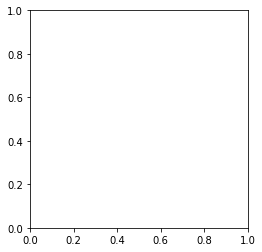

In [96]:
geo_data = gpd.read_file('C:\\Users\\fcmun\\Documents\\Geopandas_Practice_Files\\Country_Data.shp')
country_shapes = geo_data.merge(groups, on='NAME')
country_shapes.plot('Library', cmap='OrRd', legend = True)
